<a href="https://colab.research.google.com/github/MinsooKwak/Kaggle_note/blob/main/Data_science/big_data_derby_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고: https://www.kaggle.com/code/mattop/big-data-derby-2022-eda

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px         # graphing
from plotly.subplots import make_subplots
import plotly.figure_factory as ff  # plotly.js에 아직 포함되지 않은 wrapper function을 포함하고 있는 모듈
import missingno as msno            # describe data
import os

# plotly를 이용해서 오프라인으로 그릴 떄 2가지의 모듈이 필요함
  # 1) plotly.offline.plot
  # 2) plotly.graph_objs
  ## init_notebook_mode() : 주피터 노트북 모드 킴
  ## iplot 사용하여 그래프 그림
  #### plotly의 2가지 문법 1) graph_objs 2) express 문법

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [4]:
# matplotlib.pylab rcParams를 이용하여 그림(figure)의 기본 설정을 지정할 수 있음
plt.rcParams["figure.figsize"]= (12,8)

추가 rcParams 관련 : https://mirandaherr.tistory.com/18

In [5]:
# os.walk() 사용
for dirname, _ , filenames in os.walk('/content/drive/MyDrive/kaggle/big_data_derby_2022'):
  # dirname: root
  # _ : root 안에 있는 폴더들
  # filenames : root 아래 있는 파일들
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_2019_complete.csv
/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_start_table.csv
/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_race_table.csv
/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_tracking_table.csv


os.walk() 설명

어떤 경로의 모든 하위 폴더와 파일을 탐색하고 싶을 때 2개의 API를 사용하여 작업을 처리할 수 있음

- os.listdir() : 인자로 전달된 dir의 모든 파일을 출력해줌
- os.walk() : 하위의 폴더들을 for문으로 탐색할 수 있음
  
    - 인자로 전달된 path에 대해 다음 3개의 값이 있는 tuple을 넘겨줌
      - root : dir와 files가 있는 path
      - dirs : roots 아래 있는 폴더들
      - files : root 아래 있는 파일들


os.walk() 사용법 : https://codechacha.com/ko/python-walk-files/


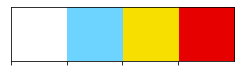

In [6]:
colors= ["#FFFFFF", "#6CD4FF", "#F7DF00", "#E60000"]
sns.palplot(sns.color_palette(colors))

# dataset 설명

In [7]:
start_df = pd.read_csv('/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_start_table.csv')
race_df = pd.read_csv('/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_race_table.csv')
tracking_df = pd.read_csv('/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_tracking_table.csv')
nyra_2019 = pd.read_csv('/content/drive/MyDrive/kaggle/big_data_derby_2022/nyra_2019_complete.csv',
                        names=['track_id','race_date','race_number','program_number','trakus_index',
                   'latitude','longtitude','distance_id','course_type','track_condition',
                   'run_up_distance','race_type','purse','post_time','weight_carried',
                   'jockey','odds','delete'])

### dataset 살펴보기

In [8]:
nyra_2019= nyra_2019.drop('delete',axis=1)  # 마지막 열은 기존 예시에 없었으므로 제거
nyra_2019.head(3)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longtitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090


In [9]:
nyra_2019.describe().style.background_gradient(cmap= sns.light_palette("Orange",as_cmap=True))
# palette 안에 여러개의 색상이 포함되어 있기 때문에 as_cmap=True 를 사용해줘야함

,race_number,trakus_index,latitude,longtitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds
count,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000
mean,5.505409,183.865213,41.203867,-73.777024,756.315127,67.919189,88878.907779,420.424807,120.713291,1482.919877
std,2.860656,118.332690,0.977123,0.047111,179.688689,38.922712,127824.025516,280.254500,4.351881,1952.415229
min,1.000000,1.000000,40.666711,-73.832601,450.000000,0.000000,16000.000000,100.000000,110.000000,0.000000
25%,3.000000,88.000000,40.673456,-73.828834,600.000000,45.000000,41000.000000,233.000000,118.000000,335.000000
50%,6.000000,176.000000,40.713934,-73.769148,800.000000,54.000000,62000.000000,349.000000,120.000000,730.000000
75%,8.000000,264.000000,40.717393,-73.725636,850.000000,80.000000,80000.000000,516.000000,122.000000,1740.000000
max,13.000000,1062.000000,43.073992,-73.714826,2000.000000,280.000000,1500000.000000,1259.000000,160.000000,19100.000000


### start_df 살펴보기

In [10]:
start_df.head(3)

,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5


In [11]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [12]:
# 3.4 이하일 경우 upgrade
#!pip install matplotlib --upgrade

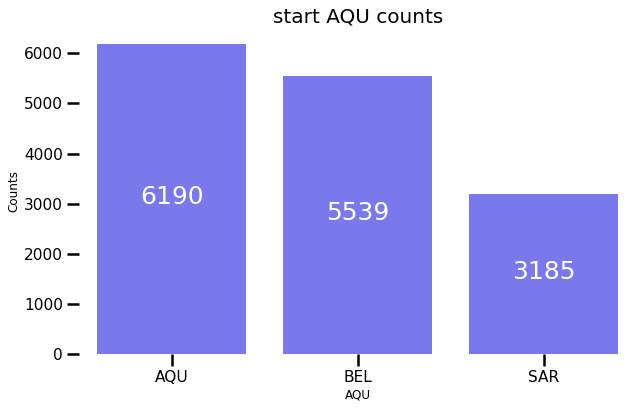

In [13]:
#sns.set_stype('white', {'font.family':'NanumSquare'})
sns.set_context('poster', font_scale=0.7, rc={'grid.linewidth':5})

fig1, axes = plt.subplots(1,1,figsize=(10,6))
ax1 = sns.barplot(x=start_df.AQU.value_counts().index, y=start_df.AQU.value_counts(), color='blue', alpha=0.6)
ax1.set_title('start AQU counts', fontsize=20)
ax1.set_xlabel('AQU', fontsize=12)
ax1.set_ylabel('Counts',fontsize=12)

# matplotlib 3.4 이상 contatiner 기능 사용 
for container in ax1.containers:
  ax1.bar_label(container, label_type='center', padding=2, size=25, color='white', rotation=0)

sns.despine(left=True, bottom=True)
plt.show()